# References
## 
* 

# Parameters adjusted

# Considerations
* For now, I am using a gamma order of 10, but Williams and Baker (2009) used gaussians for their inputs.
* I added the independent noise input (which acted on the dendritic compartment) on the configuration file. Here I only change some of its parameters.
* Because Renshaw cell effects on motoneurons are inhibitory, I can separate cortical to interneuron input according to their nature. In this case, just using excitatory sinpses will do.
* Right now, I could not obtain the flat input.

In [1]:
import sys
sys.path.insert(0, '../../..')
import time
from scipy import signal
from scipy.fftpack import fft

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [2]:
simDuration_ms = 10000
timeStep_ms = 0.05
t = np.arange(0, simDuration_ms, timeStep_ms)
availableMNs = range(300)
recordedMN = 2#np.random.choice(availableMNs)
print 'Recorded MN #'+str(recordedMN)

Recorded MN #2


<IPython.core.display.Javascript object>


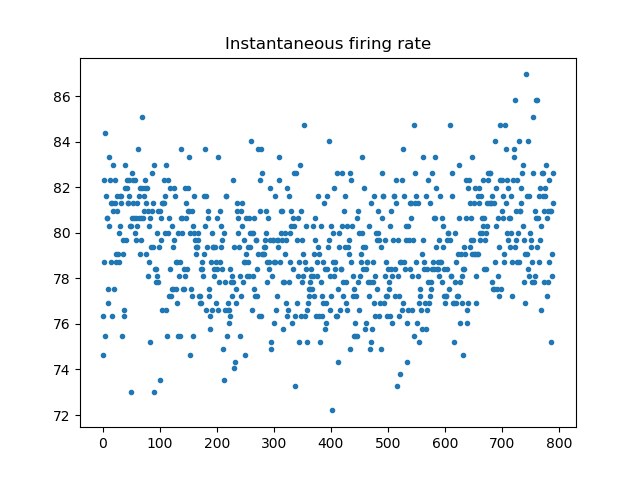

<IPython.core.display.Javascript object>


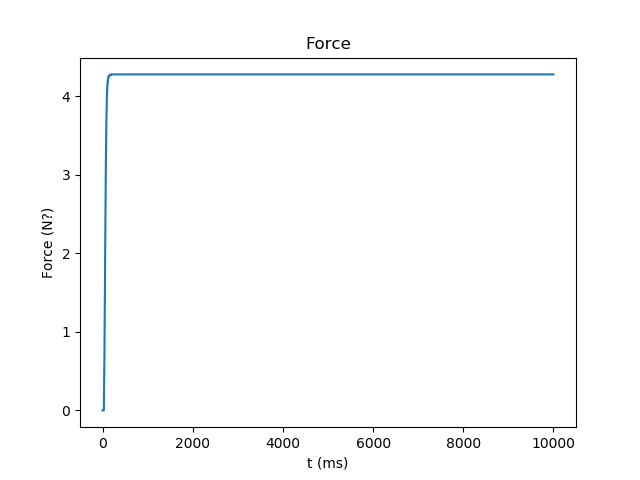

<IPython.core.display.Javascript object>


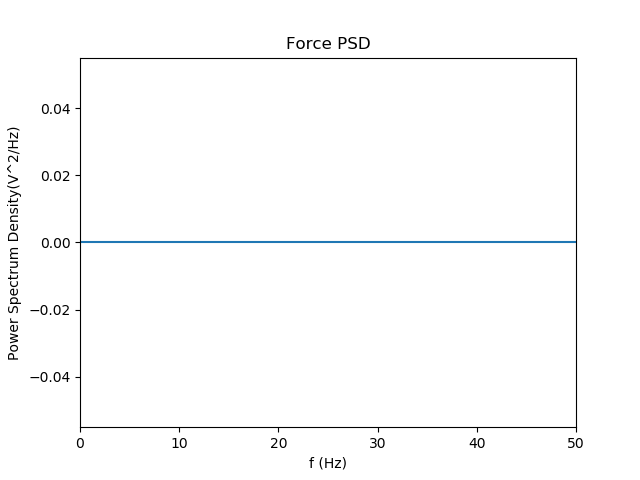

<IPython.core.display.Javascript object>


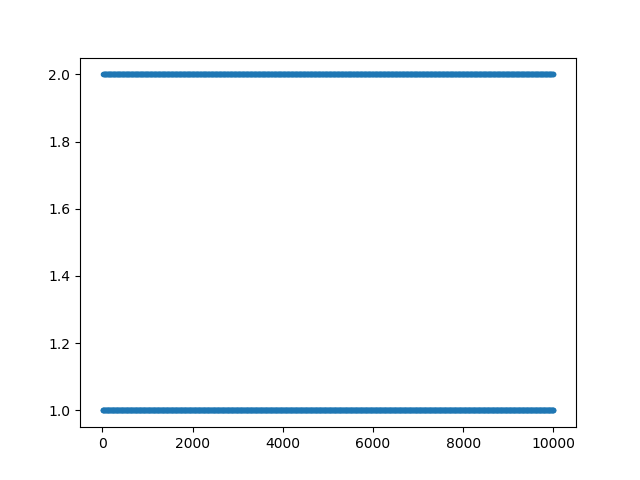

<IPython.core.display.Javascript object>


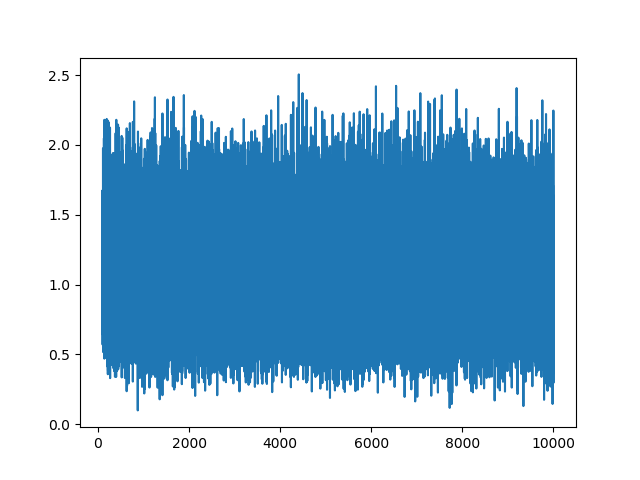

Mean conductance 1.0826849890353536


In [12]:
spikeInstant = []
unitNumber = []
force = []
instantaneousFiring = []
g = []

filename = 'frequency_analysis/output.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    spikeInstant.append(float(line.split()[0]))
    unitNumber.append(int(float(line.split()[1])))
f.close()

filename = 'frequency_analysis/force.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    force.append(float(line.split()[0]))
f.close()

filename = 'frequency_analysis/g.dat'
f = open(filename, 'r')
lines = f.readlines()
for line in lines:
    g.append(float(line.split()[0]))
f.close()

MNSpikeInstants = [y for x, y in enumerate(spikeInstant) if unitNumber[x]==recordedMN]
if not any(MNSpikeInstants):
    print "No spikes for this MN"
elif len(MNSpikeInstants)==1:
    print "Length 1..."
else:
    for i in range(len(MNSpikeInstants)-1):
        instantaneousFiring = np.append(instantaneousFiring, 
           [1000/(MNSpikeInstants[i+1]-MNSpikeInstants[i])])
    plt.figure()
    plt.plot(instantaneousFiring, '.')
    plt.title('Instantaneous firing rate')
    plt.show()
    
    fs=1/(timeStep_ms*1e-3)
    
    plt.figure()
    plt.plot(t, force)
    plt.title('Force')
    plt.xlabel('t (ms)')
    plt.ylabel('Force (N?)')
    plt.show()
    
#     `boxcar`, `triang`, `blackman`, `hamming`, `hann`, `bartlett`,
#         `flattop`, `parzen`, `bohman`, `blackmanharris`, `nuttall`,
#         `barthann`, `kaiser` (needs beta), `gaussian` (needs standard
#         deviation), `general_gaussian` (needs power, width), `slepian`
#         (needs width), `dpss` (needs normalized half-bandwidth),
#         `chebwin` (needs attenuation), `exponential` (needs decay scale),
#         `tukey` (needs taper fraction)
    
    staticForce = [y for x,y in enumerate(force) if t[x]>1000]
    fr = 8
    nperseg = 4*fs/2/fr
    noverlap = None
    nfft = 8*nperseg
    detrend = 'constant'
    f2, Pxx = signal.welch(staticForce, fs, ('tukey', 0.1), nperseg, noverlap, nfft, detrend)
    
    plt.figure()
    plt.plot(f2, Pxx)
    plt.title('Force PSD')
    plt.xlabel('f (Hz)')
    plt.ylabel('Power Spectrum Density(V^2/Hz)')
#     plt.yscale('log')
    plt.xlim([0, 50])
#     plt.xlim((0, 500))
    plt.show()

plt.figure()
plt.plot(spikeInstant, unitNumber, '.')
plt.show()

plt.figure()
plt.plot(t[int(100/0.05):], g[int(100/0.05):])
plt.show()
print "Mean conductance "+str(np.mean(g[int(100/0.05):]))